# Product Matching
### Kelompok 1
1. 12S16002 - Diana Pebrianty Pakpahan
2. 12S16022 - Rosa Afresia Siagian
3. 12S16026 - Yolanda Nainggolan
4. 12S16028 - Kaleb Lonari Simanungkalit


### Dataset
Data yang digunakan pada proyek ini berasal dari kaggle (https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others) yang terdiri dari 9 file csv mengenai produk pakaian dalam.

## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re

df_1 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/ae_com.csv')
df_2 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/amazon_com.csv')
df_3 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/btemptd_com.csv')
df_4 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/calvinklein_com.csv')
df_5 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/hankypanky_com.csv')
df_6 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/macys_com.csv')
df_7 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/shop_nordstrom_com.csv')
df_8 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/us_topshop_com.csv')
df_9 = pd.read_csv('C:/Users/Yolanda Nainggolan/Productmatching/victoriassecret_com.csv')

C:\Users\Yolanda Nainggolan\Anaconda3\lib\site-packages\tqdm\std.py:654: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dataFrame = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9])
dataFrame.sample(5)

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
11008,The Bralette Collection Scoopneck Bralette,$20.00,$7.99,https://www.victoriassecret.com/bras/shop-all-...,Victoria's Secret,Scoopneck Bralette,Victoriassecret US,Upgrade your everyday in this effortless unlin...,NaN,NaN,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",XL,Black Lace Back
10923,Micro Hipster,$13.00,$13.00,http://shop.nordstrom.com/s/calvin-klein-micro...,CALVIN KLEIN,Women's Panties,Nordstrom US,Alluring micro hipster briefs in a lightweight...,NaN,NaN,"[""Lined cotton gusset."", ""86% nylon, 14% elast...","[""Large"", ""Medium"", ""Small""]","[""Large"", ""Medium"", ""Small""]",Bare
337963,PINK NEW! Wear Everywhere Multi-Way Push-Up Bra,$34.95,$34.95,https://www.victoriassecret.com/pink/panties/w...,Victoria's Secret Pink,Wear Everywhere Multi-Way Push-Up Bra,Victoriassecret US,"A true wardrobe essential with soft, no-show c...",4.2,1.530000e+02,NaN,"[""32AA"", ""32A"", ""32B"", ""32C"", ""32D"", ""32DD"", ""...",36A,neon sunset logo print
65982,Body by Victoria NEW! Daisy Lace Slip,$52.00,$52.00,https://www.victoriassecret.com/lingerie/shop-...,Victoria's Secret,Daisy Lace Slip,Victoriassecret US,What dreams are made of: this little slip in f...,1.0,1.450000e+38,NaN,"[""XS"", ""S"", ""M"", ""L"", ""XL""]",S,sheer pink
382547,Dream Angels Demi Bra,$58.50,$58.50,https://www.victoriassecret.com/bras/shop-all-...,Victoria's Secret,Demi Bra,Victoriassecret US,"This dreamy demi is even more heavenly, with s...",NaN,NaN,NaN,"[""30A"", ""30B"", ""30C"", ""30D"", ""30DD"", ""30DDD"", ...",32A,Sheer Pink Solid Lace


## 2. Data Preprocessing

In [3]:
dataFrame = dataFrame[['product_name', 'description']]
dataFrame = dataFrame[pd.notnull(dataFrame['description'])]
dataFrame.sample(5)

,product_name,description
247213,PINK Wrap Triangle Top,A classic triangle top with a twist! Features ...
115897,Very Sexy Crochet Lace Push-Up Bra,WHY TO BUY: The world’s sexiest push-up is a b...
185238,PINK NEW! Wear Everywhere Push-Up Bra,"An everyday fave with soft, no-show cups and a..."
158802,So Obsessed by Victoria's Secret Add-1½-Cups P...,This push-up gives you a little extra lift for...
4093,b.enticing Allover-Lace Boyshort 945237,Gorgeous embroidered lace at the hem lends lov...


In [4]:
dataFrame.shape

(613143, 2)

In [5]:
dataFrame.isnull().sum()

product_name    0
description     0
dtype: int64

#### Catatan:
Karena jumlah data sangat besar, kita hanya memakai 10.000 data yang akan dipilih secara random

In [6]:
df = dataFrame.sample(n=10000, random_state=42)
df.sample(10)

,product_name,description
319745,Cotton Lingerie Lace-waist Thong Panty,This wisp of a panty is virtually invisible un...
164139,Cotton Lingerie NEW! Lace-waist Cheeky Panty,Silky-soft and stretchy cotton makes this chee...
181456,Dream Angels Push-Up Bra,"Our most heavenly push-up ever, with softer Me..."
2361,Signature Lace Removable Pad Bralette,"Our best-selling triangle bralette, now with a..."
1616,Aerie Bikini,SHAKE THAT BOOTY! Your go-to fave has just a p...
398324,Dream Angels Push-Up Bra,"Our most heavenly push-up ever, with softer Me..."
122808,Dream Angels NEW! Demi Bra,"This dreamy demi is even more heavenly, with s..."
34895,Rose-Appliqué Bralette 257116,A beautiful rose appliqué adds the perfect pop...
342364,Victoria Sport NEW! Incredible by Victoria Spo...,Game-changer: your favorite maximum-support sp...
253102,The Bralette Collection Scoopneck Bralette,Upgrade your everyday in this effortless unlin...


In [7]:
df.shape

(10000, 2)

In [8]:
df.index = range(10000)
df['description'].apply(lambda x: len(x.split(' '))).sum()

564187

In [9]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text)
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['description'] = df['description'].apply(cleanText)

In [10]:
def print_description(index):
    example = df[df.index == index][['description', 'product_name']].values[0]
    if len(example) > 0:
        print('Description:\n', example[0])
        print('\n product_name:', example[1])
        
print_description(12)

Description:
 our #1 push-up is seier than ever with plush, even softer padding for the lift and cleavage you love and a more natural feel, plus edges that disappear under clothes.lift & lining push-up padding adds 1 cup size underwire cupsstraps & hooks fully adjustable straps back closure double row of hook-and-eye closures 4 settings to ensure a perfect fit can be worn classic or crossbackdetails & fabric supersmooth neckline disappears under clothes cutouts between cups vs charm on side of cup imported nylon/spande 

 product_name: Very Sexy Push-Up Bra


In [30]:
print_description(50)

Description:
 work it in this one-piece wonder! features a high cut leg that’s flirty and super flattering. push & lining removable padding lightly lined   straps & hooks pull on style   details & fabric adjustable lace-up front low back high leg cut fully lined imported nylon/spande/polyester

 product_name: PINK NEW! Lace-Up Front One-Piece


## 3. Features Extraction

In [12]:
import nltk
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
tokens = df.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['description']), tags=[r.product_name]), axis=1)

In [13]:
tokens.values[30]

TaggedDocument(words=['like', 'magic', 'the', 'lift', 'you', 'love', 'without', 'the', 'wires', 'in', 'an', 'unbelievably', 'soft', 'and', 'sleek', 'shape', 'lift', 'lining', 'push-up', 'padding', 'wireless', 'cups', 'straps', 'hooks', 'adjustable', 'straps', 'pullover', 'style', 'details', 'fabric', 'racerback', 'long', 'line', 'supersoft', 'lined', 'sides', 'for', 'the', 'smoothest', 'shape', 'imported', 'nylon/spande'], tags=['Easy Push-Up Bra'])

In [14]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [15]:
model = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model.build_vocab([x for x in tqdm(tokens.values)])

100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2500181.21it/s]


In [16]:
len(model.docvecs)

1504

In [17]:
model.wv.vocab.keys()

dict_keys(['total', 'top', 'drawer', 'essential', 'with', 'lots', 'of', 'push', 'and', 'show', 'off', 'strappy', 'back', 'features', 'palm', 'lace', 'smooth', 'no-show', 'cups', 'most', 'super', 'soft', 'pad', 'adjustable', 'straps', 'structured', 'underwire', 'hook-and-eye', 'closure', 'imported', 'nylon/spande', 'game-changer', 'your', 'favorite', 'maimum-support', 'sport', 'bra', 'meets', 'zip-front', 'for', 'easy', 'on', 'fleible', 'you', 'can', 'feel', 'fully', 'all', 'in', 'stay-cool', 'body-wick', 'fabric', 'details', 'maimum', 'support', 'breathable', 'padding', 'wicking', 'liner', 'to', 'keep', 'etra', 'dry', 'comfort', 'bonded', 'seamless', 'technology', 'that', 'eliminates', 'irritation', 'supersoft', 'elastic', 'band', 'movement', 'locking', 'inside', 'hook-', '-eye', 'performance', 'perfect', 'running', 'boing', 'cardio', 'keeps', 'cool', 'machine', 'wash.', 'tumble', 'body', 'nylon/lycra®spande', 'mesh', 'polyester/spande', 'this', 'signature', 'modern', 't-shirt', 'demi'

In [19]:
model.most_similar('top')

C:\Users\Yolanda Nainggolan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('stay', 0.19738906621932983),
 ('puts', 0.1793029010295868),
 ('silicone', 0.17592638731002808),
 ('bows', 0.16747917234897614),
 ('bella', 0.1668696254491806),
 ('sporting', 0.16360992193222046),
 ('matchback', 0.16018342971801758),
 ('1390l', 0.1597033441066742),
 ('keeping', 0.1595989465713501),
 ('laser-cut', 0.15812215209007263)]

In [20]:
%%time
for epoch in range(30):
    model.train(utils.shuffle([x for x in tqdm(tokens.values)]), total_examples=len(tokens.values), epochs=1)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 2489053.47it/s]


Wall time: 34.7 s


In [ ]:
model.save("model.doc2vec")

In [ ]:
model = gensim.models.Doc2Vec.load('model.doc2vec')  

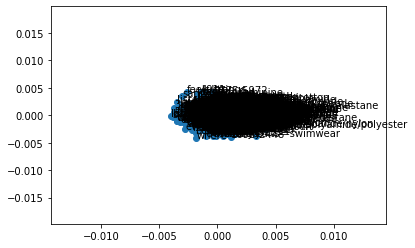

In [21]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()

## 4. Kalkulasi Kemiripan

In [22]:
def matching(inputs):
    new_sentence = inputs.split(" ")
    print("Berikut adalah 10 produk yang mirip")
    tag = model.docvecs.most_similar(positive=[model.infer_vector(new_sentence)],topn=10)
    
    return tag

In [34]:
matching("pure seamless thong")

Berikut adalah 10 produk yang mirip


[('PINK Lace Trim Boyshort', 0.891903281211853),
 ('Very Sexy Satin Cami & Short Set', 0.8483166098594666),
 ("b.tempt'd Ciao Bella Balconette Bra", 0.8296986818313599),
 ('Very Sexy Lace Plunge Bodysuit', 0.8219165802001953),
 ('Aphrodite Babydoll with G-String', 0.8210660815238953),
 ('Queen Anne’s Lace Bralette', 0.8031582832336426),
 ('Aphrodite Bralette', 0.8028275966644287),
 ('PINK NEW! Super Soft Lace Trim Thong', 0.789655327796936),
 ('Aerie Cutout Longline Bralette', 0.7854816913604736),
 ('PINK Lace Triangle Halter', 0.7848737239837646)]

In [35]:
matching("Body by Victoria NEW! Unlined Demi Bra")

Berikut adalah 10 produk yang mirip


[('PINK NEW! Lace Logo Trim Thong', 0.7858799695968628),
 ('PINK NEW! Logo Lace Trim Thong', 0.7368625402450562),
 ('PINK NEW! Logo Bikini', 0.6995430588722229),
 ('PINK NEW! Logo Thong', 0.6921399831771851),
 ('PINK NEW! Lace Trim Hipster', 0.683012843132019),
 ('PINK NEW! Allover Floral Lace Thong', 0.6576569080352783),
 ('Very Sexy Lace & Mesh Strappy Cheeky Panty', 0.6409251689910889),
 ('PINK NEW! Logo Cheekster', 0.6341161727905273),
 ('PINK NEW! Lace Logo Trim Cheekster', 0.6301356554031372),
 ('PINK Lace Back No-Show Thong', 0.6257041692733765)]

In [36]:
matching("aerie cutout longline bralette")

Berikut adalah 10 produk yang mirip


[('Aphrodite Bralette', 0.8399407267570496),
 ('Camo Original Rise Thong', 0.8278664350509644),
 ('PINK Lace Trim Boyshort', 0.8236719965934753),
 ('Signature Lace Melanie Bra', 0.8191442489624023),
 ('Queen Anne’s Lace Bralette', 0.8154631853103638),
 ('Dream Angels NEW! Crochet Lace Cheekster Panty', 0.8146559000015259),
 ('PINK Mini Bikini Bottom', 0.8118687272071838),
 ('Very Sexy NEW! Lace Cutout Cheeky Panty', 0.8097690343856812),
 ('PINK Lace Triangle Halter', 0.809079647064209),
 ('Alexandra Lace Eyemask', 0.8057281374931335)]